In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import yfinance as yf

In [54]:
dates = pd.bdate_range("2022-01-01","2025-01-01")
print(dates)
length = len(dates)
print(length)
price = yf.download("AAPL",start=dates[0],end=dates[-1])
spy = yf.download("SPY",start=dates[0],end=dates[-1])

aapl = price["Close"]["AAPL"].rename("aapl")
spy = spy["Close"]["SPY"].rename("spy")
print(aapl)
data = pd.concat([aapl,spy],axis = 1)
print(data)

lookback = 20
data["momentum1"] = data["aapl"].pct_change(lookback)
data["momentum2"] = data["spy"].pct_change(lookback)
print(data)


/var/folders/tt/2zmln3691579pyj9pfcgqgtm0000gn/T/ipykernel_31322/2413662933.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price = yf.download("AAPL",start=dates[0],end=dates[-1])
[*********************100%***********************]  1 of 1 completed
/var/folders/tt/2zmln3691579pyj9pfcgqgtm0000gn/T/ipykernel_31322/2413662933.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("SPY",start=dates[0],end=dates[-1])
[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', length=783, freq='B')
783
Date
2022-01-03    178.443130
2022-01-04    176.178421
2022-01-05    171.492081
2022-01-06    168.629318
2022-01-07    168.796005
                 ...    
2024-12-24    257.286682
2024-12-26    258.103729
2024-12-27    254.685883
2024-12-30    251.307877
2024-12-31    249.534180
Name: aapl, Length: 753, dtype: float64
                  aapl         spy
Date                              
2022-01-03  178.443130  453.210358
2022-01-04  176.178421  453.058624
2022-01-05  171.492081  444.358917
2022-01-06  168.629318  443.941498
2022-01-07  168.

In [59]:
data["position"]=np.where((data["momentum1"]>0.05)&(data["momentum2"]>0.03),1,0)
data[["position"]]

,position
Date,
2022-01-03,0
2022-01-04,0
2022-01-05,0
2022-01-06,0
2022-01-07,0
...,...
2024-12-24,0
2024-12-26,0
2024-12-27,0


In [60]:
data["return"]=data["aapl"].pct_change()
data["strategy"] = data["position"].shift(1)*data["return"]
print(data)

                  aapl         spy  momentum1  momentum2  position    return  \
Date                                                                           
2022-01-03  178.443130  453.210358        NaN        NaN         0       NaN   
2022-01-04  176.178421  453.058624        NaN        NaN         0 -0.012691   
2022-01-05  171.492081  444.358917        NaN        NaN         0 -0.026600   
2022-01-06  168.629318  443.941498        NaN        NaN         0 -0.016693   
2022-01-07  168.796005  442.186310        NaN        NaN         0  0.000988   
...                ...         ...        ...        ...       ...       ...   
2024-12-24  257.286682  596.076904   0.108773   0.009696         0  0.011478   
2024-12-26  258.103729  596.116699   0.101931   0.004518         0  0.003176   
2024-12-27  254.685883  589.841614   0.087941  -0.003035         0 -0.013242   
2024-12-30  251.307877  583.110535   0.062655  -0.020497         0 -0.013263   
2024-12-31  249.534180  580.989136   0.0

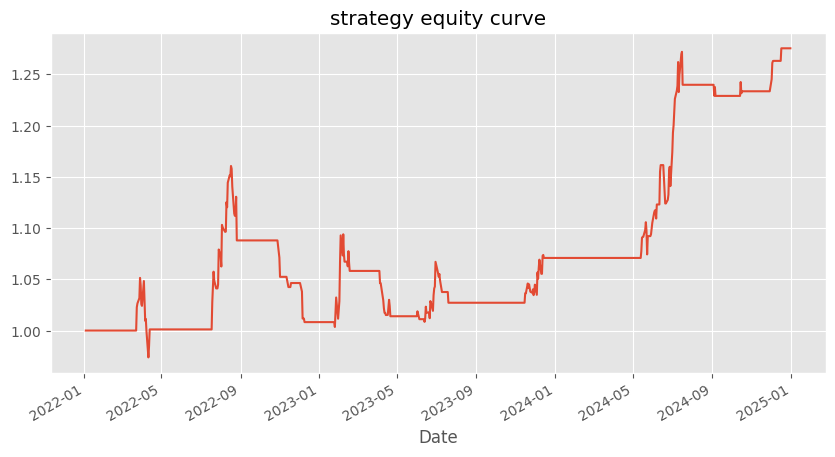

In [61]:
cum = (1+data["strategy"]).cumprod()
cum.plot(title="strategy equity curve",figsize=(10,5))
plt.show()

In [62]:
sharpe = data["strategy"].mean()/data["strategy"].std()*np.sqrt(252)
print(sharpe)

0.8768159380954713


In [63]:
max_dd = (cum/cum.cummax()-1).min()
print(max_dd)

-0.13542279728912276
